# Introduction to Convolutional Neural Networks


**Ecole Centrale Nantes**

**Diana Mateus**


**MIMOUNI Luca**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Introduction

Now that we understand the mechanics behind a Neural Network, we can now build more sophisticate model, with various neuron and hideen layer. 

### 0. Loading the dataset
Start by runing the following lines to load and visualize the data.

In [2]:
# UNCOMMENT IF USING COLAB
# from google.colab import drive
# drive.mount('/content/drive')
IMDIR = './dataset/'

In [3]:
def load_dataset(IMDIR):
    train_dataset = h5py.File(IMDIR+'dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:])
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File(IMDIR+'dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:])
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])

    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset(IMDIR)

#### Visualize data

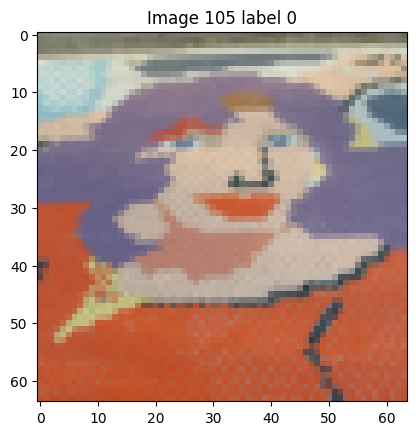

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [4]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]),
       "images of dimensionality "
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

### 1. CNNs with Keras and Tensorflow

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
- change the number of classes and the input size
- remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input has already three channels
- you may need to transpose the labels vector
- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification.
- also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain  the exact number .

**2.4** Display and discuss the ROC curve of at least 3 different CNN configurations  


In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, auc

In [6]:
# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset(IMDIR)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T

input_shape = x_train.shape[1:]
num_classes = 2 # Binary classificiation
print('Input shape:', input_shape)
print('Number of class:', num_classes)

Input shape: (64, 64, 3)
Number of class: 2


In [7]:
print(y_train)

[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]


In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
print(y_train)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

### Convolutional Neural Network (CNN)
CNN is a widely used Deep Learning Model, they are particulary used to 'find patterns in image, recognizing objects, classes and categories.'

In [9]:
#build the model
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        25,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,482 (173.76 KB)

 Trainable params: 44,482 (173.76 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Change hyperparameters
batch_size1 = 209
epochs1 = 15

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.fit(x_train, y_train, batch_size=batch_size1, epochs=epochs1, validation_split=0.1)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6436 - loss: 0.6760 - val_accuracy: 0.8095 - val_loss: 0.5302
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6383 - loss: 0.6591 - val_accuracy: 0.8095 - val_loss: 0.5245
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6383 - loss: 0.6442 - val_accuracy: 0.8095 - val_loss: 0.5368
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6383 - loss: 0.6193 - val_accuracy: 0.8095 - val_loss: 0.5511
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6383 - loss: 0.6051 - val_accuracy: 0.8095 - val_loss: 0.5492
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.6383 - loss: 0.5923 - val_accuracy: 0.8095 - val_loss: 0.5311
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.6383 - loss: 0.5716 - val_accuracy: 0.8095 - val_loss: 0.5163
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6383 - loss: 0.5603 - val_accuracy: 0.8095 - val_loss: 0.

In [11]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │        25,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,482 (173.76 KB)

 Trainable params: 44,482 (173.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#compile and fit
batch_size2 = 3
epochs2 = 10

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size=batch_size2, epochs=epochs2, validation_split=0.1)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4602 - loss: 0.7013 - val_accuracy: 0.8095 - val_loss: 0.5814
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5777 - loss: 0.6098 - val_accuracy: 0.7619 - val_loss: 0.5147
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7222 - loss: 0.4711 - val_accuracy: 0.7619 - val_loss: 0.5125
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8744 - loss: 0.3293 - val_accuracy: 0.5714 - val_loss: 0.6253
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8407 - loss: 0.3774 - val_accuracy: 0.7143 - val_loss: 0.7136
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8178 - loss: 0.3493 - val_accuracy: 0.6667 - val_loss: 0.7186
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8619 - loss: 0.3675 - val_accuracy: 0.6667 - val_loss: 0.9408
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8960 - loss: 0.2710 - val_accuracy: 0.7143 - val_loss:

In [13]:
#evaluate
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.4713574945926666
Test accuracy 0.8399999737739563


In [14]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


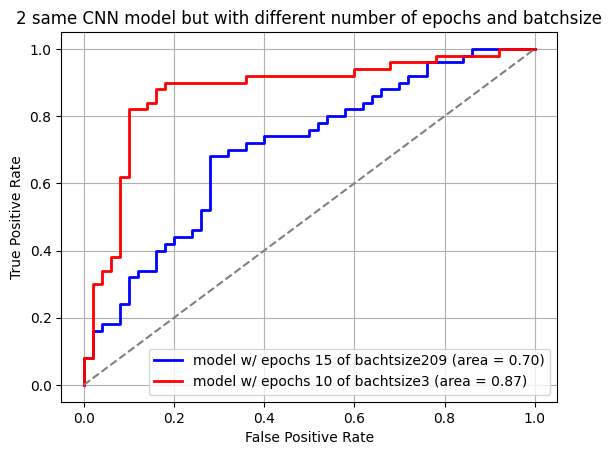

In [15]:
fpr1, tpr1, thresholds1 = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc1 = auc(fpr1, tpr1) # Area under the curve

fpr2, tpr2, thresholds2 = roc_curve(y_test.ravel(), y_pred2.ravel())
roc_auc2 = auc(fpr2, tpr2) # Area under the curve

# Plot ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'model w/ epochs {epochs1} of bachtsize{batch_size1} (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'model w/ epochs {epochs2} of bachtsize{batch_size2} (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('2 same CNN model but with different number of epochs and batchsize')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 2 Custom training loop
Replace the fit function by your own tensorflow  implementation

- Instantiate one of keras.optimizers to train the model.

- Instantiate a loss from keras.losses

- Define the metrics (from keras.metrics)

- Use `tf.data.Dataset.from_tensor_slices` to create an iterable dataset from a numpy arrays. Do this for the training and test datasets.

- Change the model (optional, after the training loop runs to optimize the performance)

- Program a loop over a fixed number of epochs,
    * For each epoch iterating over the batches
    * Within a `GradientTape()` scope,
      - do a forward pass on the model for the current batch (call the model on the batch data)
      - Compute the loss
      - Compute the gradients of the loss w.r.t parameters
      - Call the optimimzer to update the weights with computed the gradients
    * At the end of each epoch compute the validation metrics


Look at https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough specifically at the TRAINING LOOP SECTION
for a recent documentation on custom training.


In [16]:
import tensorflow as tf

In [17]:
# Optimizer : Stochastic gradient
optimizer = keras.optimizers.SGD(learning_rate=0.01)

# Loss function 
loss_object = keras.losses.BinaryCrossentropy(from_logits=True)


In [18]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)
  return loss_object(y_true=y, y_pred=y_)


l = loss(model2, x_train, y_train, training=False)
print("Loss test: {}".format(l))


Loss test: 0.28172776103019714


c:\Users\lucam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:750: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [19]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)


In [20]:
## Note: Rerunning this cell uses the same model variables

num_epochs = 201
batch_size = 32

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=len(x_train))
dataset = dataset.batch(batch_size)

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []


for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.CategoricalAccuracy()

  # Training loop - 
  for X,y in dataset:
    # Optimize the model
    loss_value, grads = grad(model2, X, y)
    optimizer.apply_gradients(zip(grads, model2.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model2(X, training=True))

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))


Epoch 000: Loss: 0.452, Accuracy: 77.990%
Epoch 050: Loss: 0.271, Accuracy: 92.344%
Epoch 100: Loss: 0.185, Accuracy: 93.780%
Epoch 150: Loss: 0.139, Accuracy: 96.172%
Epoch 200: Loss: 0.121, Accuracy: 97.608%


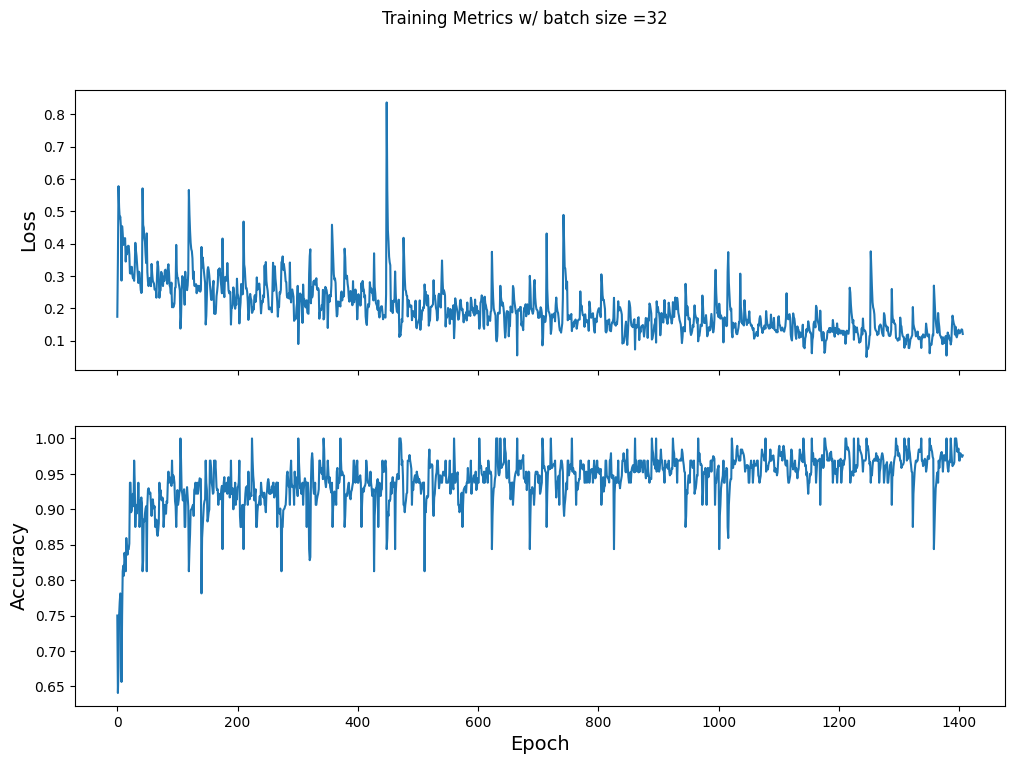

In [21]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle(f'Training Metrics w/ batch size ={batch_size}')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()


Loss function is slowly decreasing while accuracy is increasing; showing a good training of the model. However, we can see lots of variation within the 2 functions; so that it could lead to bad result if the last epoch is on a spike (right?).

We can see that batch size have a direct impact on model accuracy. We find that with batch size of 32 we can achieve 97 % of accuracy within 200 epochs. We can also try mini-batch (i.e, 1 $<$ bacth_size $<$ Sample_size), or Batch Gradient Descent when Batch size = Sample Size. However, for mini-batch, the time computation increase drastictly so that she sould consider a higher batch size if we want to have a result 'quickly'.

ADITIONAL BONUS
- Early stopping
- Tensorboard
- CAM/GradCAM